# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from joblib import dump

In [2]:
X_train = np.load('../data/X_train.npy')
X_train_all_indices = np.load('../data/X_train_all_indices.npy')
X_train_selected_indices = np.load('../data/X_train_selected_indices.npy')
y_train = np.load('../data/y_train.npy')

In [3]:
scaler_train = StandardScaler()
X_train = scaler_train.fit_transform(X_train)
scaler_train_all_indices = StandardScaler()
X_train_all_indices = scaler_train_all_indices.fit_transform(X_train_all_indices)
scaler_train_selected_indices = StandardScaler()
X_train_selected_indices = scaler_train_selected_indices.fit_transform(X_train_selected_indices)

# Model Training

In [17]:
model = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 7, 15, 30],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 50, 100],
    'p': [1, 2],
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: 

In [14]:
param_grid = {
    'n_neighbors': [30, 40, 50, 60],
    'weights': ['uniform', 'distance'],
    'leaf_size': [3, 5, 10],
    'p': [1, 2],
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': [3, 5, 10],
                         'n_neighbors': [30, 40, 50, 60], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error', verbose=1)

In [18]:
model = KNeighborsRegressor(leaf_size=3, n_neighbors=30, p=1, weights='distance')
model.fit(X_train, y_train)
dump(model, '../models/knn_10_bands.joblib')

['../models/knn_10_bands.joblib']

In [19]:
model_all_indices = KNeighborsRegressor(leaf_size=3, n_neighbors=30, p=1, weights='distance')
model_all_indices.fit(X_train_all_indices, y_train)
dump(model_all_indices, '../models/knn_all_bands.joblib')

['../models/knn_all_bands.joblib']

In [20]:
model_selected_indices = KNeighborsRegressor(leaf_size=3, n_neighbors=30, p=1, weights='distance')
model_selected_indices.fit(X_train_selected_indices, y_train)
dump(model_selected_indices, '../models/knn_selected_bands.joblib')

['../models/knn_selected_bands.joblib']

# Model Evaluation

In [21]:
X_test = np.load('../data/X_test.npy')
X_test_all_indices = np.load('../data/X_test_all_indices.npy')
X_test_selected_indices = np.load('../data/X_test_selected_indices.npy')
y_test = np.load('../data/y_test.npy')

In [22]:
scaler_test = StandardScaler()
X_test = scaler_test.fit_transform(X_test)
scaler_test_all_indices = StandardScaler()
X_test_all_indices = scaler_test_all_indices.fit_transform(X_test_all_indices)
scaler_test_selected_indices = StandardScaler()
X_test_selected_indices = scaler_test_selected_indices.fit_transform(X_test_selected_indices)

In [23]:
y_pred = model.predict(X_test)
y_pred_all_indices = model_all_indices.predict(X_test_all_indices)
y_pred_selected_indices = model_selected_indices.predict(X_test_selected_indices)

In [31]:
print('KNN:\t\t\t', mean_absolute_error(y_test, y_pred))
print('KNNAllIndices:\t\t', mean_absolute_error(y_test, y_pred_all_indices))
print('KNNSelectedIndices:\t', mean_absolute_error(y_test, y_pred_selected_indices))

KNN:			 4.743251897296201
KNNAllIndices:		 4.730876167229662
KNNSelectedIndices:	 4.7480451343099705


Without Scaler:
- KNN: 4.770458
- KNNAllIndices: 4.847478
- KNNSelectedIndices: 5.042232

With MinMaxScaler:
- KNN: 5.266787
- KNNAllIndices: 4.863129
- KNNSelectedIndices: 4.970147

## Visualization of True Labels vs. Predictions

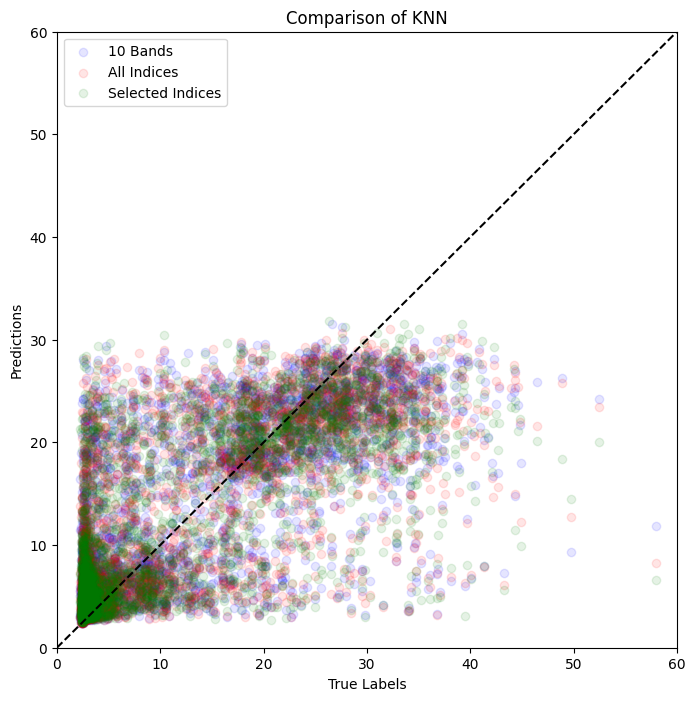

In [15]:
fig = plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, color="blue", alpha=0.1, label="10 Bands")
plt.scatter(y_test, y_pred_all_indices, color="red", alpha=0.1, label="All Indices")
plt.scatter(y_test, y_pred_selected_indices, color="green", alpha=0.1, label="Selected Indices")
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("Comparison of KNN")
plt.legend()

plt.show()

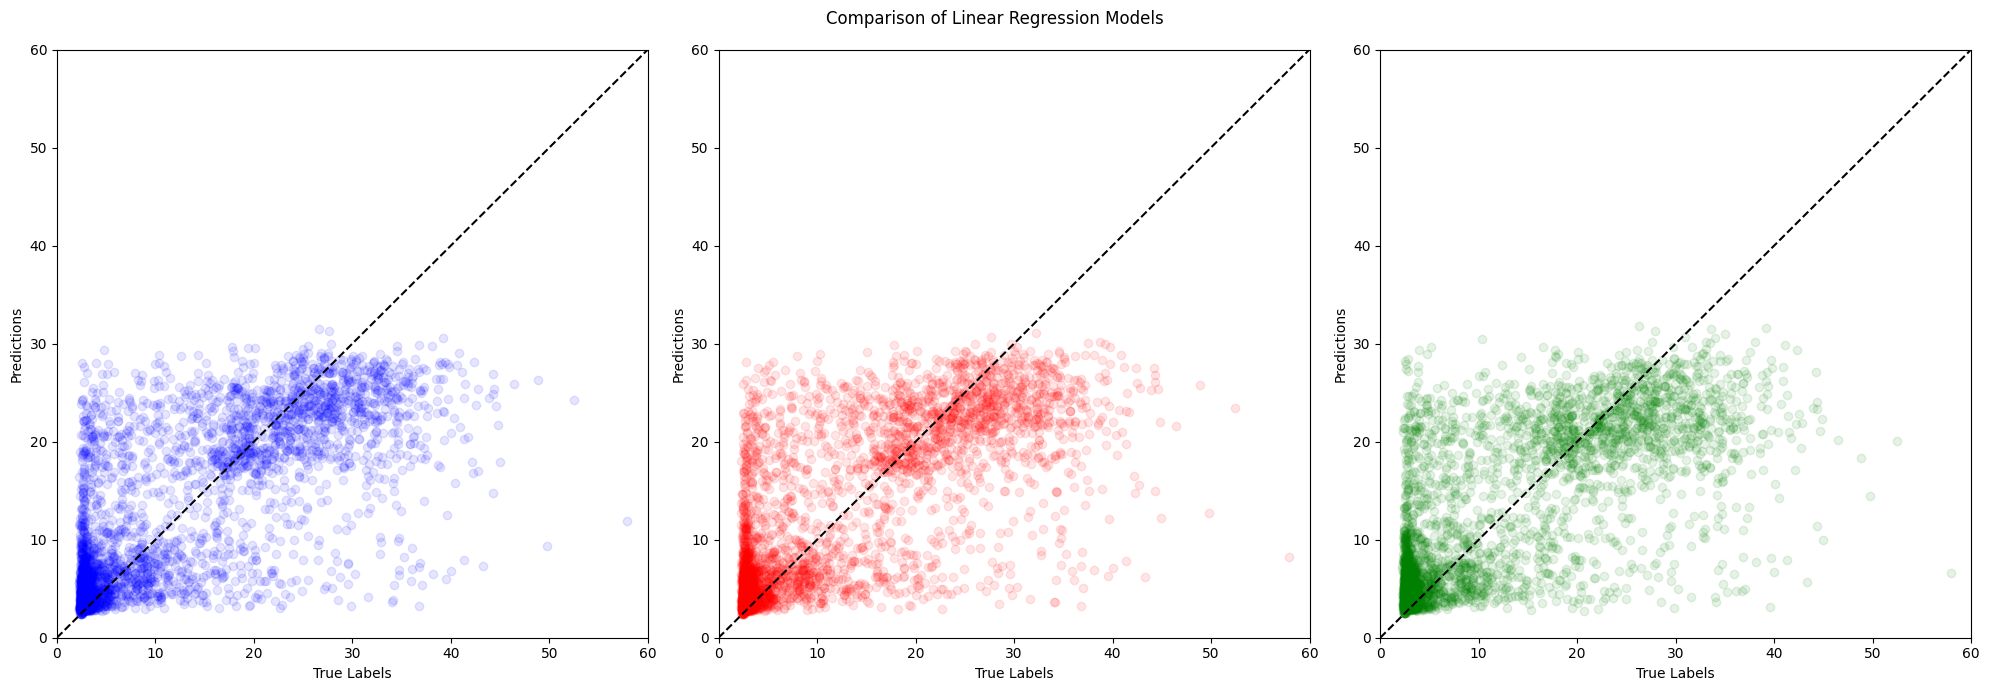

In [16]:
# Create a figure and specify the layout to have 1 row and 2 columns
fig = plt.figure(figsize=(20, 7))

plt.subplot(1, 3, 1)  # Arguments are: nrows, ncols, index
plt.scatter(y_test, y_pred, color="blue", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_all_indices, color="red", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_selected_indices, color="green", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")

plt.suptitle("Comparison of Linear Regression Models")
plt.tight_layout()
plt.show()